<a href="https://colab.research.google.com/github/viswal18/Employee-Salary-Prediction/blob/main/Employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import joblib

In [2]:
try:
    data = pd.read_csv('adult 3.csv', na_values='?')
    print("dataset loaded succesfully")
except FileNotFoundError:
    print("Error:data file not found")


dataset loaded succesfully


In [3]:
print("Dataset head")
print(data.head(10))

Dataset head
   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18               NaN  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29               NaN  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Pr

In [4]:
print(data.tail(5))

      age workclass  fnlwgt   education  educational-num      marital-status  \
9610   25   Private  318644   Bachelors               13       Never-married   
9611   20   Private  227594     HS-grad                9       Never-married   
9612   59   Private  165695  Assoc-acdm               12  Married-civ-spouse   
9613   55   Private  127728     HS-grad                9  Married-civ-spouse   
9614   49   Private  123681  Assoc-acdm               12           Separated   

            occupation relationship   race  gender  capital-gain  \
9610   Exec-managerial    Own-child  White    Male           0.0   
9611     Other-service    Own-child  White  Female           0.0   
9612  Transport-moving      Husband  White    Male           0.0   
9613      Craft-repair      Husband  White    Male           0.0   
9614             Sales    Unmarried    NaN     NaN           NaN   

      capital-loss  hours-per-week native-country income  
9610           0.0            40.0  United-States  

In [5]:
print(data.shape)

(9615, 15)


In [6]:
data.isna().sum()

,0
age,0
workclass,584
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,585
relationship,0
race,1
gender,1


In [7]:
print("data info")
data.info()

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9615 entries, 0 to 9614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9615 non-null   int64  
 1   workclass        9031 non-null   object 
 2   fnlwgt           9615 non-null   int64  
 3   education        9615 non-null   object 
 4   educational-num  9615 non-null   int64  
 5   marital-status   9615 non-null   object 
 6   occupation       9030 non-null   object 
 7   relationship     9615 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9450 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.1+ MB


In [8]:
print(data.isnull().sum())

age                  0
workclass          584
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         585
relationship         0
race                 1
gender               1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     165
income               1
dtype: int64


In [9]:
data['workclass'] = data['workclass'].replace({'?':'Others'})
print(data['workclass'].value_counts())

workclass
Private             6574
Self-emp-not-inc     782
Local-gov            609
State-gov            429
Self-emp-inc         353
Federal-gov          279
Without-pay            4
Never-worked           1
Name: count, dtype: int64


In [10]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       1222
Exec-managerial      1213
Craft-repair         1183
Adm-clerical         1079
Sales                1066
Other-service         960
Machine-op-inspct     621
Transport-moving      429
Handlers-cleaners     414
Farming-fishing       310
Tech-support          279
Protective-serv       194
Priv-house-serv        57
Armed-Forces            3
Name: count, dtype: int64


In [11]:
for col in ['workclass', 'occupation']:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mode()[0])

In [12]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             7158
Self-emp-not-inc     782
Local-gov            609
State-gov            429
Self-emp-inc         353
Federal-gov          279
Name: count, dtype: int64


In [13]:
if 'native-country' in data.columns and data['native-country'].isnull().any():
    data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

In [14]:
print(data.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               1
gender             1
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     0
income             1
dtype: int64


In [15]:
print(data.relationship.value_counts())

relationship
Husband           3797
Not-in-family     2521
Own-child         1510
Unmarried         1033
Wife               434
Other-relative     315
Name: count, dtype: int64


In [16]:
print(data.gender.value_counts())

gender
Male      6405
Female    3204
Name: count, dtype: int64


In [17]:
print(data.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Private  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4     Prof-specialty    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country incom

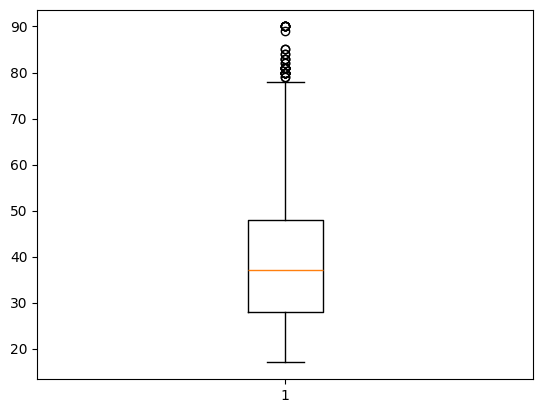

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

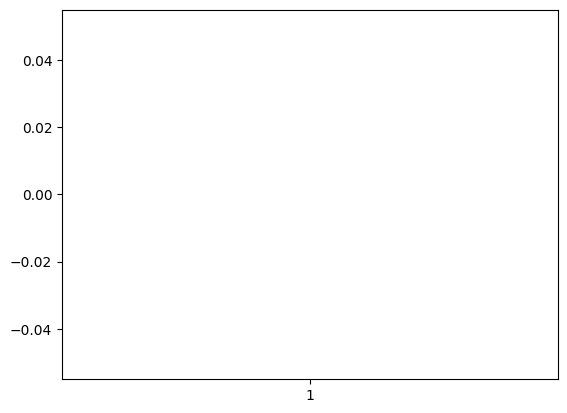

In [19]:
plt.boxplot(data['capital-gain'])
plt.show()

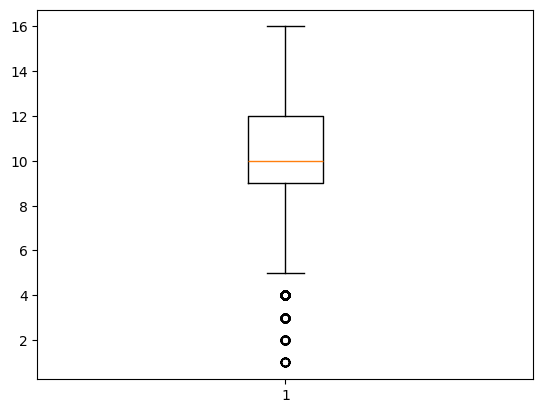

In [20]:
plt.boxplot(data['educational-num'])
plt.show()

In [21]:
data.shape

(9610, 15)

In [22]:
data_encoded = data.copy()

In [23]:
categorical_cols = data_encoded.select_dtypes(include=['object']).columns

print(f" Encoding coolumns: {list(categorical_cols)} ---")

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    print(f"'{col}' encoded.")

 Encoding coolumns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'] ---
'workclass' encoded.
'education' encoded.
'marital-status' encoded.
'occupation' encoded.
'relationship' encoded.
'race' encoded.
'gender' encoded.
'native-country' encoded.
'income' encoded.


In [24]:
print("encoded data head")
print(data_encoded.head())

encoded data head
   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
4   18          2  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1           0.0           0.0   
1           4             0     4       1           0.0           0.0   
2          10             0     4       1           0.0           0.0   
3           6             0     2       1        7688.0           0.0   
4           9             3     4       0           0.0           0.0   

   hours-per-week  native-country  income  
0            40.0              37       0  
1            50.

In [25]:
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train.shape

(7688, 14)

In [28]:
X_test.shape

(1922, 14)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors":KNeighborsClassifier()
}

In [30]:
results = {}
best_model_name = ''
best_accuracy = 0
best_model_pipeline = None

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', models)
])


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

for name, model in models.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_pipeline = pipeline



Random Forest
Accuracy: 0.8491
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1454
           1       0.73      0.60      0.66       468

    accuracy                           0.85      1922
   macro avg       0.80      0.77      0.78      1922
weighted avg       0.84      0.85      0.84      1922


Gradient Boosting
Accuracy: 0.8725
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1454
           1       0.83      0.60      0.70       468

    accuracy                           0.87      1922
   macro avg       0.85      0.78      0.81      1922
weighted avg       0.87      0.87      0.87      1922


Logistic Regression
Accuracy: 0.8257
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1454
           1       0.74      0.43      0.55       468

    acc

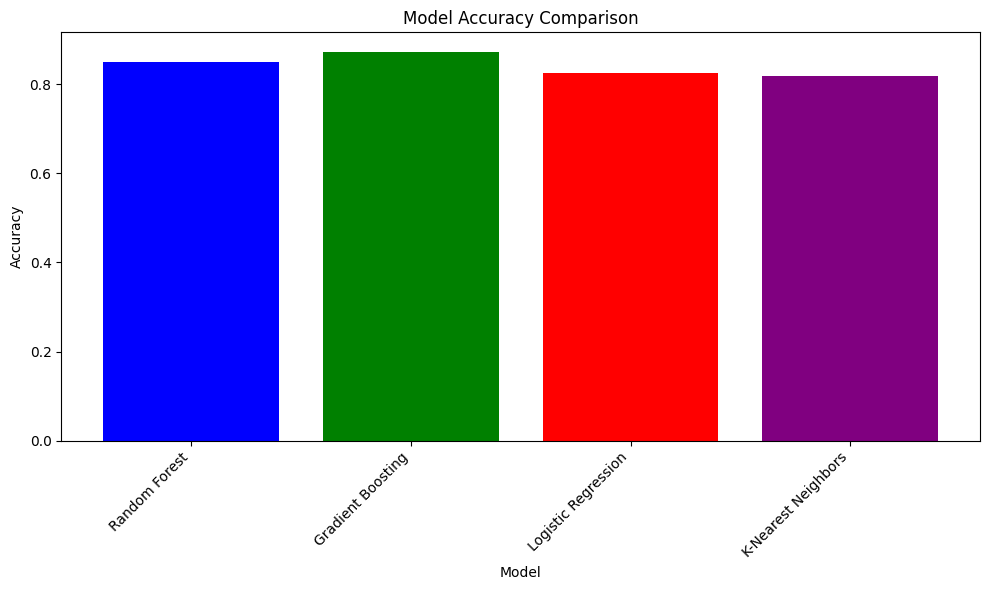

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
print(f"Best model: {best_model_name},accuracy of {best_accuracy:.4f}")

Best model: Gradient Boosting,accuracy of 0.8725


In [35]:
model_filename = 'salary_model.pkl'
joblib.dump(best_model_pipeline, model_filename)

print(f"saved successfully,'{model_filename}'")

saved successfully,'salary_model.pkl'


In [36]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [37]:
!pip install streamlit pyngrok --quiet


In [38]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

try:
    model = joblib.load('salary_model.pkl')
except FileNotFoundError:
    st.error("Model file 'salary_model.pkl' not found. Please ensure it's in the same directory as this script.")
    st.stop()

occupation_map = {'Prof-specialty': 9, 'Craft-repair': 2, 'Exec-managerial': 3, 'Adm-clerical': 0, 'Sales': 11, 'Other-service': 7, 'Machine-op-inspct': 6, 'Transport-moving': 13, 'Handlers-cleaners': 5, 'Farming-fishing': 4, 'Tech-support': 12, 'Protective-serv': 10, 'Priv-house-serv': 8, 'Armed-Forces': 1}
education_map = {'HS-grad': 11, 'Some-college': 15, 'Bachelors': 9, 'Masters': 12, 'Assoc-voc': 8, '11th': 1, 'Assoc-acdm': 7, '10th': 0, '7th-8th': 5, 'Prof-school': 14, '9th': 6, '12th': 2, 'Doctorate': 10, '5th-6th': 4, '1st-4th': 3, 'Preschool': 13}
gender_map = {'Male': 1, 'Female': 0}
workclass_map = {'Private': 2, 'Self-emp-not-inc': 5, 'Local-gov': 1, 'State-gov': 6, 'Self-emp-inc': 4, 'Federal-gov': 0}
marital_status_map = {'Married-civ-spouse': 2, 'Never-married': 4, 'Divorced': 0, 'Separated': 5, 'Widowed': 6, 'Married-spouse-absent': 3, 'Married-AF-spouse': 1}
relationship_map = {'Husband': 0, 'Not-in-family': 1, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5, 'Other-relative': 2}
race_map = {'White': 4, 'Black': 2, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 0, 'Other': 3}
native_country_map = {'United-States': 38, 'Mexico': 25, 'Philippines': 28, 'Germany': 10, 'Puerto-Rico': 33, 'Canada': 5, 'El-Salvador': 8, 'India': 18, 'Cuba': 6, 'England': 9, 'Jamaica': 22, 'South': 35, 'China': 4, 'Italy': 21, 'Dominican-Republic': 7, 'Vietnam': 40, 'Guatemala': 11, 'Japan': 23, 'Poland': 29, 'Columbia': 6, 'Taiwan': 37, 'Haiti': 16, 'Iran': 19, 'Portugal': 31, 'Nicaragua': 27, 'Peru': 30, 'Greece': 13, 'Ecuador': 8, 'France': 9, 'Ireland': 20, 'Hong': 17, 'Thailand': 36, 'Trinadad&Tobago': 39, 'Honduras': 17, 'Laos': 24, 'Yugoslavia': 41, 'Scotland': 34, 'Holand-Netherlands': 15}

st.set_page_config(page_title="Employee Salary Predictor", layout="wide")

st.markdown("## Employee Salary Predictor")
st.markdown("Predict whether an employee earns `>50K` or `<=50K`")

col1, col2 = st.columns(2)

with col1:
    age = st.slider("Age", 17, 90, 35)
    education = st.selectbox("Education Level", list(education_map.keys()))
    occupation = st.selectbox("Occupation", list(occupation_map.keys()))

with col2:
    hours_per_week = st.slider("Hours Worked Per Week", 1, 99, 40)
    capital_gain = st.number_input("Capital Gain", 0, 99999, 0)
    gender = st.selectbox("Gender", list(gender_map.keys()))

if st.button("🔮 Predict Salary Class", use_container_width=True):
    input_data = {
        'age': age,
        'education': education_map[education],
        'occupation': occupation_map[occupation],
        'hours-per-week': hours_per_week,
        'capital-gain': capital_gain,
        'gender': gender_map[gender]
    }

    required_columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                        'marital-status', 'occupation', 'relationship', 'race', 'gender',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

    full_input_data = {col: 0 for col in required_columns}
    full_input_data.update(input_data)
    full_input_data['workclass'] = workclass_map.get('Private', 0)
    full_input_data['fnlwgt'] = 180000
    full_input_data['educational-num'] = education_map.get(education, 10)
    full_input_data['marital-status'] = marital_status_map.get('Never-married', 4)
    full_input_data['relationship'] = relationship_map.get('Not-in-family', 1)
    full_input_data['race'] = race_map.get('White', 4)
    full_input_data['capital-loss'] = 0
    full_input_data['native-country'] = native_country_map.get('United-States', 38)

    input_df = pd.DataFrame([full_input_data])
    input_df = input_df[required_columns]

    prediction_encoded = model.predict(input_df)
    prediction_label = '>50K' if prediction_encoded[0] == 1 else '<=50K'

    st.markdown("---")
    st.subheader("📊 Prediction Result")

    if prediction_label == '>50K':
        st.success("💰 Income Class: **>50K**")
    else:
        st.info("💼 Income Class: **<=50K**")

    with st.expander("🔍 See Processed Input Data"):
        st.dataframe(input_df, use_container_width=True)

st.markdown("---")
st.caption("Created by Viswal Santhosh")


Writing app.py


In [39]:
from pyngrok import ngrok


ngrok.set_auth_token("30EKxxRzBQfWm7ik14wtKoy3ZH6_3NoEmvWDUD3JbdsSRZnpo")


In [40]:
from pyngrok import ngrok
import threading
import time
import os

ngrok.kill()


def run_streamlit():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_streamlit)
thread.start()

time.sleep(5)


public_url = ngrok.connect(8501)
print("Streamlit app running at:", public_url)

Streamlit app running at: NgrokTunnel: "https://347b12b3e5cf.ngrok-free.app" -> "http://localhost:8501"
